<a href="https://colab.research.google.com/github/Priyanka-Behera7/Fake-Review-Identification/blob/main/FakeReviewIdentification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re

## Dataset

In [ ]:
fr = pd.read_csv('/content/finalReview.csv')
#fr= fr[['Date' , 'URL' , 'Review_Title' , 'Author' , 'Review_text' , 'Rating' , 'Review_helpful' , 'Rev_Type']]
fr.head()

,Unnamed: 0,Date,URL,Review_Title,Author,Rating,Review_text,Review_helpful,Sentiment,Subjectivity,...,Adv_Count,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Rev_Type
0,0,Reviewed in India on 10 August 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,It s a logitech Definitely worth buying it,Aqib Mehmood,5,A really awesome keyboard i was actually go...,77,0.359722,0.552778,...,6.0,4.0,3.0,2.0,2.0,1.0,9.0,0.706522,13.0,1
1,1,Reviewed in India on 27 March 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Great deal got it for With Lightening ...,Chauhan,4,I know its costly but its worth your money ...,55,0.233125,0.468542,...,10.0,4.0,7.0,2.0,2.0,1.0,6.0,0.666667,16.0,1
2,2,Reviewed in India on 19 December 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Loved it,Smok3y,5,I had been contemplating to buy this for a l...,18,0.338750,0.568750,...,3.0,4.0,7.0,1.0,2.0,0.0,9.0,0.735294,22.0,1
3,3,Reviewed in India on 25 June 2020,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Not a good purchase please read description,Kumar Saharsh,1,SO Very very small keys For fast typers w...,11,0.139083,0.507840,...,6.0,4.0,8.0,1.0,2.0,2.0,5.0,0.687500,22.0,1
4,4,Reviewed in India on 27 October 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Good only when new,Amazon Customer,2,Good to use keyboard while it is new but it...,15,0.165427,0.698140,...,4.0,2.0,9.0,2.0,1.0,1.0,3.0,0.731343,28.0,0


In [ ]:
fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9438 entries, 0 to 9437
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9438 non-null   int64  
 1   Date            9438 non-null   object 
 2   URL             9438 non-null   object 
 3   Review_Title    9438 non-null   object 
 4   Author          9438 non-null   object 
 5   Rating          9438 non-null   int64  
 6   Review_text     9438 non-null   object 
 7   Review_helpful  9438 non-null   int64  
 8   Sentiment       9438 non-null   float64
 9   Subjectivity    9438 non-null   float64
 10  Neg_Count       9438 non-null   int64  
 11  Word_Count      9438 non-null   int64  
 12  Unique_words    9438 non-null   int64  
 13  Noun_Count      9438 non-null   float64
 14  Adj_Count       9438 non-null   float64
 15  Verb_Count      9438 non-null   float64
 16  Adv_Count       9438 non-null   float64
 17  Pro_Count       9438 non-null   f

In [ ]:
fr.isnull().sum()

,0
Unnamed: 0,0
Date,0
URL,0
Review_Title,0
Author,0
Rating,0
Review_text,0
Review_helpful,0
Sentiment,0
Subjectivity,0


In [ ]:
fr["Date"].value_counts().to_frame()

,count
Date,
Reviewed in India on 4 October 2020,131
Reviewed in India on 21 October 2020,118
Reviewed in India on 22 October 2020,114
Reviewed in India on 24 October 2020,109
Reviewed in India on 20 October 2020,103
...,...
Reviewed in India on 11 August 2019,1
Reviewed in India on 2 February 2020,1
Reviewed in India on 15 July 2019,1


## Data Analysis

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

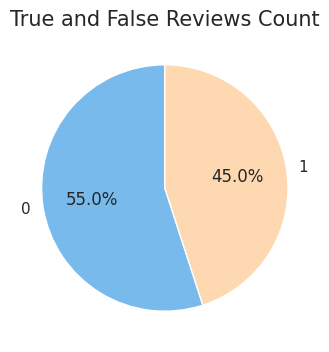

In [ ]:
colors = ['#79BAEC','#FED8B1']
plt.figure(figsize=(4,4))
label = fr['Rev_Type'].value_counts()
plt.pie(label.values,colors = colors, labels=label.index, autopct= '%1.1f%%', startangle=90)
plt.title('True and False Reviews Count', fontsize=15)
plt.show()

In [ ]:
sns.set_style('darkgrid')

Text(0.5, 1.0, 'Rating Grouped by Rev_Type')

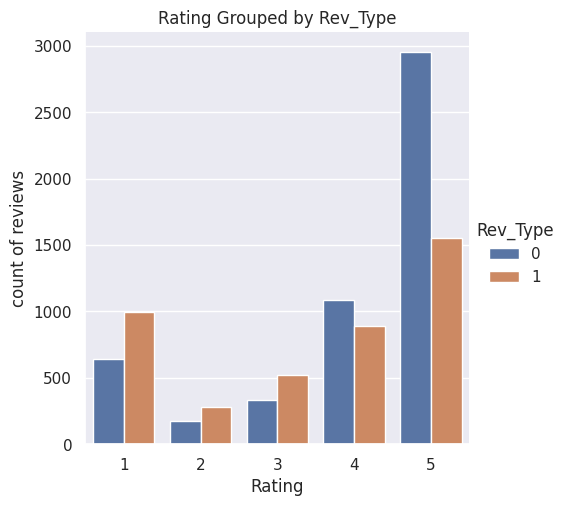

In [ ]:
sns.catplot(x ='Rating',kind="count", hue="Rev_Type",data=fr)
plt.xlabel("Rating")
plt.ylabel("count of reviews")
plt.title("Rating Grouped by Rev_Type")

## Cleaning

In [ ]:
fr.head()

,Unnamed: 0,Date,URL,Review_Title,Author,Rating,Review_text,Review_helpful,Sentiment,Subjectivity,...,Adv_Count,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Rev_Type
0,0,Reviewed in India on 10 August 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,It s a logitech Definitely worth buying it,Aqib Mehmood,5,A really awesome keyboard i was actually go...,77,0.359722,0.552778,...,6.0,4.0,3.0,2.0,2.0,1.0,9.0,0.706522,13.0,1
1,1,Reviewed in India on 27 March 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Great deal got it for With Lightening ...,Chauhan,4,I know its costly but its worth your money ...,55,0.233125,0.468542,...,10.0,4.0,7.0,2.0,2.0,1.0,6.0,0.666667,16.0,1
2,2,Reviewed in India on 19 December 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Loved it,Smok3y,5,I had been contemplating to buy this for a l...,18,0.338750,0.568750,...,3.0,4.0,7.0,1.0,2.0,0.0,9.0,0.735294,22.0,1
3,3,Reviewed in India on 25 June 2020,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Not a good purchase please read description,Kumar Saharsh,1,SO Very very small keys For fast typers w...,11,0.139083,0.507840,...,6.0,4.0,8.0,1.0,2.0,2.0,5.0,0.687500,22.0,1
4,4,Reviewed in India on 27 October 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Good only when new,Amazon Customer,2,Good to use keyboard while it is new but it...,15,0.165427,0.698140,...,4.0,2.0,9.0,2.0,1.0,1.0,3.0,0.731343,28.0,0


In [ ]:
#fr.drop(['Unnamed: 0'], axis = 1, inplace=True)
dt = fr.loc[:, fr.columns[4:-1]]
dt.drop(['Neg_Count','Unique_words','Pro_Count', 'Pre_Count', 'Con_Count', 'Art_Count',
       'Nega_Count', 'Aux_Count'], axis=1, inplace=True)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9438 entries, 0 to 9437
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Author          9438 non-null   object 
 1   Rating          9438 non-null   int64  
 2   Review_text     9438 non-null   object 
 3   Review_helpful  9438 non-null   int64  
 4   Sentiment       9438 non-null   float64
 5   Subjectivity    9438 non-null   float64
 6   Word_Count      9438 non-null   int64  
 7   Noun_Count      9438 non-null   float64
 8   Adj_Count       9438 non-null   float64
 9   Verb_Count      9438 non-null   float64
 10  Adv_Count       9438 non-null   float64
 11  Authenticity    9438 non-null   float64
 12  AT              9438 non-null   float64
dtypes: float64(8), int64(3), object(2)
memory usage: 958.7+ KB


In [ ]:
fr = fr[['Rev_Type','Review_Title', 'Author', 'Review_text']]
fr.head()

,Rev_Type,Review_Title,Author,Review_text
0,1,It s a logitech Definitely worth buying it,Aqib Mehmood,A really awesome keyboard i was actually go...
1,1,Great deal got it for With Lightening ...,Chauhan,I know its costly but its worth your money ...
2,1,Loved it,Smok3y,I had been contemplating to buy this for a l...
3,1,Not a good purchase please read description,Kumar Saharsh,SO Very very small keys For fast typers w...
4,0,Good only when new,Amazon Customer,Good to use keyboard while it is new but it...


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
stop = stopwords.words('english')
fr['Review_Title'] = fr['Review_Title'].apply(lambda x : " ".join([word for word in x.split() if word not in stop]))
fr['Author'] = fr['Author'].apply(lambda x : " ".join([word for word in x.split() if word not in stop]))
fr['Review_text'] = fr['Review_text'].apply(lambda x : " ".join([word for word in x.split() if word not in stop]))
fr[['Review_Title', 'Author', 'Review_text']].head()

/tmp/ipython-input-3055215532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr['Review_Title'] = fr['Review_Title'].apply(lambda x : " ".join([word for word in x.split() if word not in stop]))
/tmp/ipython-input-3055215532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr['Author'] = fr['Author'].apply(lambda x : " ".join([word for word in x.split() if word not in stop]))
/tmp/ipython-input-3055215532.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,Review_Title,Author,Review_text
0,It logitech Definitely worth buying,Aqib Mehmood,A really awesome keyboard actually going cheap...
1,Great deal got With Lightening deal,Chauhan,I know costly worth money Logitech known brand...
2,Loved,Smok3y,I contemplating buy long time Went numerous re...
3,Not good purchase please read description,Kumar Saharsh,SO Very small keys For fast typers use hands t...
4,Good new,Amazon Customer,Good use keyboard new difficult possible clean...


In [ ]:
fr['Review_Title'] = fr['Review_Title'].str.replace('[^a-zA-Z\s]',' ')
fr['Review_Title'] = fr['Review_Title'].str.lower()
fr['Author'] = fr['Author'].str.replace('[^a-zA-Z\s]',' ')
fr['Author'] = fr['Author'].str.lower()
fr['Review_text'] = fr['Review_text'].str.replace('[^a-zA-Z\s]',' ')
fr['Review_text'] = fr['Review_text'].str.lower()
fr[['Review_Title', 'Author', 'Review_text']].head()

/tmp/ipython-input-2442318358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr['Review_Title'] = fr['Review_Title'].str.replace('[^a-zA-Z\s]',' ')
/tmp/ipython-input-2442318358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr['Review_Title'] = fr['Review_Title'].str.lower()
/tmp/ipython-input-2442318358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,Review_Title,Author,Review_text
0,it logitech definitely worth buying,aqib mehmood,a really awesome keyboard actually going cheap...
1,great deal got with lightening deal,chauhan,i know costly worth money logitech known brand...
2,loved,smok3y,i contemplating buy long time went numerous re...
3,not good purchase please read description,kumar saharsh,so very small keys for fast typers use hands t...
4,good new,amazon customer,good use keyboard new difficult possible clean...


In [ ]:
def tokenize(column):
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]
fr['Review_text'] = fr.apply(lambda x: tokenize(x['Review_text']), axis=1)
fr['Review_text'].head()

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
fr.head()

In [ ]:
fr[['Rev_Type','Review_Title']]

In [ ]:
X=fr['Review_Title'].values
Y=fr['Rev_Type'].values
print(X)

In [ ]:
print(Y)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [ ]:
print(X)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify=Y, random_state=0)

## Model Training

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score),
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score),
           'f1_score':make_scorer(f1_score)}

##Model Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#model = RandomForestClassifier()
#model = svm.SVC(kernel='linear')
#model=DecisionTreeClassifier()
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)

In [ ]:
print('- Train Overall Accuracy: ', "{:.1%}".format(model.score(X_train, Y_train)))
print('- Test Overall Accuracy: ', "{:.1%}".format(model.score(X_test, Y_test)))

In [ ]:
#Accuracy test in training dataset
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data: ',training_data_accuracy)

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
Y_train_pred = cross_val_predict(model, X_train, Y_train, cv=3)
Y_train_pred

In [ ]:
precision_score(Y_train, Y_train_pred)

In [ ]:
recall_score(Y_train, Y_train_pred)

In [ ]:
f1_score(Y_train, Y_train_pred)

## Saving the model

In [ ]:
from joblib import dump,load
dump(model,'FR.joblib')